This India Air Quality (2015–2020) dataset was chosen because air pollution is a major environmental and public health concern in India. The dataset provides real, government-reported pollution data, making it reliable and meaningful for analysis.

This dataset contains air quality measurements collected across multiple Indian cities between 2015 and 2020. It brings together daily readings from air monitoring stations and captures the concentration of key air pollutants such as PM2.5, PM10, NO₂, SO₂, CO, and O₃, along with the Air Quality Index (AQI) and its corresponding categories.

The data helps describe how air pollution varies across cities, seasons, and years, making it useful for understanding long-term pollution trends and identifying highly polluted regions. Since AQI is a widely used indicator of air quality and health risk, this dataset is especially valuable for environmental analysis, public health studies, and policy-related insights.

In [37]:
# importing the necessary libraries for data analysis
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [38]:
! git config --global user.name "Charan-sai-167" # replace with your username that you used to create the Github account
! git config --global user.email "saibodduna07@gmail.com" # and the email id which you have used to create account

In [39]:
username = "Charan-sai-167" #replace with your own user name
repo = "Air-Quality-Data-Analysis" #replace with your required repo


In [40]:
! git clone https://{token}@github.com/{username}/{repo}

Cloning into 'Air-Quality-Data-Analysis'...
remote: Enumerating objects: 95, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 95 (delta 42), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (95/95), 1.28 MiB | 2.83 MiB/s, done.
Resolving deltas: 100% (42/42), done.


In [41]:
%cd {repo}

/content/Air-Quality-Data-Analysis/Air-Quality-Data-Analysis/Air-Quality-Data-Analysis


In [42]:
%ls

 all_cities_combined.csv      main.py
'Assessment Data-20251126'/   model_building.py
 data_preprocessing.py        multiapp.py
 eda.py                       preprocessed_aqi_dataset_20251217.csv
 home.py                      requirements.txt


In [43]:
import os
import pandas as pd
import glob
import plotly.express as px

In [45]:
df= pd.read_csv('all_cities_combined.csv')
df

City        Date  PM2.5    PM10    NO    NO2   NOx    NH3    CO  \
0      Jorapokhar  20/04/2017    NaN  119.49  7.75   9.26   NaN    NaN  0.32   
1      Jorapokhar  21/04/2017    NaN  170.61  8.00  10.20   NaN    NaN  0.27   
2      Jorapokhar  22/04/2017    NaN  124.64  7.92   9.45   NaN    NaN  0.29   
3      Jorapokhar  23/04/2017    NaN  107.36  7.74   9.39   NaN    NaN  0.31   
4      Jorapokhar  24/04/2017    NaN  178.28  7.49  10.72   NaN    NaN  0.33   
...           ...         ...    ...     ...   ...    ...   ...    ...   ...   
29526   Amaravati  27/06/2020  14.50   24.43  1.53   6.53  4.72   8.97  0.55   
29527   Amaravati  28/06/2020  16.65   28.51  1.43   8.32  5.59   9.77  0.66   
29528   Amaravati  29/06/2020  20.96   32.56  1.65   9.55  6.43  14.30  0.66   
29529   Amaravati  30/06/2020  21.34   35.16  1.74  10.69  7.10  13.38  0.66   
29530   Amaravati  01/07/2020  22.00   34.00  1.50   9.68  6.40   8.45  0.59   

         SO2     O3  Benzene  Toluene  Xylene    AQI    AQI_Bucket  
0      28.43  18.88      NaN      NaN     NaN    NaN           NaN  
1      29.35  15.85      NaN      NaN     NaN  148.0      Moderate  
2      33.34  17.76      NaN      NaN     NaN  135.0      Moderate  
3      34.10  21.71      NaN      NaN     NaN  107.0      Moderate  
4      38.16  17.94      NaN      NaN     NaN  124.0      Moderate  
...      ...    ...      ...      ...     ...    ...           ...  
29526  13.75  33.76     0.06     0.27    0.15   42.0          Good  
29527  10.86  37.34     0.10     0.43    0.12   49.0          Good  
29528  14.79  43.29     0.12     0.69    0.10   56.0  Satisfactory  
29529  14.58  45.32     0.14     1.42    0.20   61.0  Satisfactory  
29530  10.88  29.15     0.10     0.50     NaN   54.0  Satisfactory  

[29531 rows x 16 columns]

In [46]:
df.shape
print(f"Total number of rows: {df.shape[0]}")
print(f"Total number of columns: {df.shape[1]}")

Total number of rows: 29531
Total number of columns: 16


In [47]:
df.dtypes

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [48]:
df.head(5)

City        Date  PM2.5    PM10    NO    NO2  NOx  NH3    CO    SO2  \
0  Jorapokhar  20/04/2017    NaN  119.49  7.75   9.26  NaN  NaN  0.32  28.43   
1  Jorapokhar  21/04/2017    NaN  170.61  8.00  10.20  NaN  NaN  0.27  29.35   
2  Jorapokhar  22/04/2017    NaN  124.64  7.92   9.45  NaN  NaN  0.29  33.34   
3  Jorapokhar  23/04/2017    NaN  107.36  7.74   9.39  NaN  NaN  0.31  34.10   
4  Jorapokhar  24/04/2017    NaN  178.28  7.49  10.72  NaN  NaN  0.33  38.16   

      O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
0  18.88      NaN      NaN     NaN    NaN        NaN  
1  15.85      NaN      NaN     NaN  148.0   Moderate  
2  17.76      NaN      NaN     NaN  135.0   Moderate  
3  21.71      NaN      NaN     NaN  107.0   Moderate  
4  17.94      NaN      NaN     NaN  124.0   Moderate

In [49]:
df.tail(5)

City        Date  PM2.5   PM10    NO    NO2   NOx    NH3    CO  \
29526  Amaravati  27/06/2020  14.50  24.43  1.53   6.53  4.72   8.97  0.55   
29527  Amaravati  28/06/2020  16.65  28.51  1.43   8.32  5.59   9.77  0.66   
29528  Amaravati  29/06/2020  20.96  32.56  1.65   9.55  6.43  14.30  0.66   
29529  Amaravati  30/06/2020  21.34  35.16  1.74  10.69  7.10  13.38  0.66   
29530  Amaravati  01/07/2020  22.00  34.00  1.50   9.68  6.40   8.45  0.59   

         SO2     O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  
29526  13.75  33.76     0.06     0.27    0.15  42.0          Good  
29527  10.86  37.34     0.10     0.43    0.12  49.0          Good  
29528  14.79  43.29     0.12     0.69    0.10  56.0  Satisfactory  
29529  14.58  45.32     0.14     1.42    0.20  61.0  Satisfactory  
29530  10.88  29.15     0.10     0.50     NaN  54.0  Satisfactory

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [51]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * mis_val / len(df)

    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    mis_val_table = mis_val_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table = mis_val_table.sort_values('% of Total Values', ascending=False)

    return mis_val_table

missing_values = missing_values_table(df)
display(missing_values.style.background_gradient(cmap='Blues'))

In [52]:
df.describe().T


count        mean         std    min     25%     50%       75%  \
PM2.5    24933.0   67.450578   64.661449   0.04  28.820   48.57   80.5900   
PM10     18391.0  118.127103   90.605110   0.01  56.255   95.68  149.7450   
NO       25949.0   17.574730   22.785846   0.02   5.630    9.89   19.9500   
NO2      25946.0   28.560659   24.474746   0.01  11.750   21.69   37.6200   
NOx      25346.0   32.309123   31.646011   0.00  12.820   23.52   40.1275   
NH3      19203.0   23.483476   25.684275   0.01   8.580   15.85   30.0200   
CO       27472.0    2.248598    6.962884   0.00   0.510    0.89    1.4500   
SO2      25677.0   14.531977   18.133775   0.01   5.670    9.16   15.2200   
O3       25509.0   34.491430   21.694928   0.01  18.860   30.84   45.5700   
Benzene  23908.0    3.280840   15.811136   0.00   0.120    1.07    3.0800   
Toluene  21490.0    8.700972   19.969164   0.00   0.600    2.97    9.1500   
Xylene   11422.0    3.070128    6.323247   0.00   0.140    0.98    3.3500   
AQI      24850.0  166.463581  140.696585  13.00  81.000  118.00  208.0000   

             max  
PM2.5     949.99  
PM10     1000.00  
NO        390.68  
NO2       362.21  
NOx       467.63  
NH3       352.89  
CO        175.81  
SO2       193.86  
O3        257.73  
Benzene   455.03  
Toluene   454.85  
Xylene    170.37  
AQI      2049.00

Handling missing values

In [53]:
import pandas as pd
from datetime import datetime

# Convert Date column
df['Date'] = pd.to_datetime(df['Date'])

# Numerical columns → fill with MEDIAN (robust to outliers)
numeric_cols = [
    'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
    'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI'
]

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Categorical column → fill with MODE
df['AQI_Bucket'] = df['AQI_Bucket'].fillna(
    df['AQI_Bucket'].mode().iloc[0]
)

# Check remaining missing values
print("Missing values after cleaning:\n")
print(df.isna().sum())

# Save cleaned dataset with versioning
today = datetime.now().strftime("%Y%m%d")
file_name = f"preprocessed_aqi_dataset_{today}.csv"

df.to_csv(file_name, index=False)

print(f"\n✅ Cleaned dataset saved successfully as: {file_name}")


/tmp/ipython-input-307879523.py:5: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



Missing values after cleaning:

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

✅ Cleaned dataset saved successfully as: preprocessed_aqi_dataset_20260115.csv


**Data Visualization**

In [54]:
df["Date"] = pd.to_datetime(df["Date"])

print("Start date:", df["Date"].min())
print("End date:", df["Date"].max())


Start date: 2015-01-01 00:00:00
End date: 2020-07-01 00:00:00


In [79]:
fig = px.bar(
    city_aqi.head(10).reset_index(),
    x="City",
    y="AQI",
    title="Top 10 Most Polluted Cities (Average AQI)",
)
fig.show()


In [56]:
# What AQI categories are present in the dataset?

# Check unique AQI categories
df["AQI_Bucket"].unique()
aqi_category_count = (df["AQI_Bucket"]
    .value_counts()
    .reset_index()
)

aqi_category_count.columns = ["AQI_Bucket", "Count"]

aqi_category_count
import plotly.express as px

fig = px.bar(
    aqi_category_count,
    x="AQI_Bucket",
    y="Count",
    title="AQI Categories Present in the Dataset",
    text_auto=True
)

fig.update_layout(
    xaxis_title="AQI_Bucket",
    yaxis_title="Number of Records"
)

fig.show()
fig = px.pie(
    aqi_category_count,
    names="AQI_Bucket",
    values="Count",
    title="Distribution of AQI Categories"
)

fig.show()






In [57]:
city_avg = df.groupby('City')['AQI'].mean().reset_index()

most_polluted = city_avg.loc[city_avg['AQI'].idxmax()]
print(most_polluted)


fig = px.bar(
    city_avg.sort_values('AQI', ascending=False),
    x='City', y='AQI',
    title='Average AQI by City'
)
fig.show()



City     Ahmedabad
AQI     339.861623
Name: 0, dtype: object


In [58]:
least_polluted = city_avg.loc[city_avg['AQI'].idxmin()]
print(least_polluted)


City       Aizawl
AQI     36.238938
Name: 1, dtype: object


In [59]:
pollutants = [
    'PM2.5','PM10','NO','NO2','NOx','NH3',
    'CO','SO2','O3','Benzene','Toluene','Xylene'
]

poll_avg = df[pollutants].mean().reset_index()
poll_avg.columns = ['Pollutant', 'Average']
print(poll_avg.sort_values('Average', ascending=False))

fig = px.bar(
    poll_avg.sort_values('Average', ascending=False),
    x='Pollutant', y='Average',
    title='Average Pollutant Levels'
)
fig.show()



   Pollutant     Average
1       PM10  109.659366
0      PM2.5   64.510857
8         O3   33.994121
4        NOx   31.063568
3        NO2   27.726576
5        NH3   20.813789
2         NO   16.642601
7        SO2   13.830897
10   Toluene    7.140485
9    Benzene    2.859874
6         CO    2.153872
11    Xylene    1.788420


In [60]:
# How does AQI change over time?

aqi_time = df.groupby('Date')['AQI'].mean().reset_index()
fig = px.line(
    aqi_time,
    x='Date', y='AQI',
    title='AQI Trend Over Time'
)
fig.show()


In [61]:
# Are pollution levels similar across cities?

fig = px.box(
    df,
    x='City',
    y='AQI',
    title='AQI Distribution Across Cities'
)
fig.show()


In [63]:
# Which AQI category appears most often?

aqi_category = df['AQI_Bucket'].value_counts().reset_index()
aqi_category.columns = ['AQI Category', 'Days']
print(aqi_category)
fig = px.bar(
    aqi_category,
    x='AQI Category', y='Days',
    text='Days',
    title='AQI Category Frequency'
)
fig.show()


   AQI Category   Days
0      Moderate  13510
1  Satisfactory   8224
2          Poor   2781
3     Very Poor   2337
4          Good   1341
5        Severe   1338


In [64]:
# Are there extreme pollution days?

fig = px.box(
    df,
    y='AQI',
    title='Extreme Pollution Days (AQI Outliers)'
)
fig.show()


In [65]:
# Do PM2.5 and AQI move together?
fig = px.scatter(
    df,
    x='PM2.5', y='AQI',
    trendline='ols',
    title='PM2.5 vs AQI Relationship'
)
fig.show()


In [66]:
city_avg = df.groupby('City')['AQI'].mean().reset_index()

fig = px.pie(
    city_avg,
    names='City',
    values='AQI',
    title='City-wise Share of Average AQI'
)
fig.show()


In [67]:
fig = px.treemap(
    city_avg,
    path=['City'],
    values='AQI',
    title='City-wise Contribution to Pollution (Treemap)'
)
fig.show()


In [68]:
aqi_city = df.groupby(['City','AQI_Bucket']).size().reset_index(name='Days')

fig = px.bar(
    aqi_city,
    x='City',
    y='Days',
    color='AQI_Bucket',
    barmode='stack',
    title='AQI Categories Across Cities'
)
fig.show()


In [69]:
city_avg = df.groupby('City')['AQI'].mean().reset_index()
city_avg = city_avg.sort_values('AQI', ascending=False)

fig = px.bar(
    city_avg,
    x='City',
    y='AQI',
    title='Average AQI by City',
    color='AQI',
    color_continuous_scale='Oranges'
)
fig.show()


In [70]:
pollutants = ['PM2.5','PM10','NO2','SO2','O3','CO']
city_poll = df.groupby('City')[pollutants].mean().reset_index()

fig = px.bar(
    city_poll.melt(id_vars='City', var_name='Pollutant', value_name='Value'),
    x='City',
    y='Value',
    color='Pollutant',
    barmode='group',
    title='City-wise Pollutant Contribution'
)
fig.show()


In [71]:
import pandas as pd
import plotly.express as px


df['Date'] = pd.to_datetime(df['Date'])

# Create Year, Month, and Season columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Define seasons
def get_season(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    else:
        return 'Autumn'

df['Season'] = df['Month'].apply(get_season)


In [72]:
seasonal_bubble = df.groupby(['City','Season'])['AQI'].mean().reset_index()

fig = px.scatter(
    seasonal_bubble,
    x='Season',
    y='City',
    size='AQI',
    color='AQI',
    title='City-wise Seasonal AQI Intensity (Bubble Chart)'
)
fig.show()


In [73]:
city_month = df.groupby(['City','Month'])['AQI'].mean().reset_index()
city_month = city_month.dropna()

fig = px.scatter(
    city_month,
    x='Month',
    y='City',
    size='AQI',
    color='AQI',
    title='City-wise Monthly AQI (Bubble Chart)'
)
fig.show()


In [74]:
# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
import plotly.express as px


# 3️⃣ Feature Engineering
df['Month'] = df['Date'].dt.month

def get_season(month):
    if month in [12,1,2]: return 'Winter'
    elif month in [3,4,5]: return 'Spring'
    elif month in [6,7,8]: return 'Summer'
    else: return 'Autumn'

df['Season'] = df['Month'].apply(get_season)

# Fill missing AQI with median
df['AQI'] = df['AQI'].fillna(df['AQI'].median())

# Define AQI category (Good, Moderate, Poor)
def aqi_category(aqi):
    if aqi <= 50: return 'Good'
    elif aqi <= 100: return 'Moderate'
    else: return 'Poor'

df['AQI_Category'] = df['AQI'].apply(aqi_category)

# 4️⃣ Prepare Features
pollutants = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3']
features = pollutants + ['City','Month','Season']

# Drop missing pollutant rows
df = df.dropna(subset=features)

# Encode categorical features
le_city = LabelEncoder()
df['City_enc'] = le_city.fit_transform(df['City'])
le_season = LabelEncoder()
df['Season_enc'] = le_season.fit_transform(df['Season'])
le_aqi_cat = LabelEncoder()
df['AQI_Category_enc'] = le_aqi_cat.fit_transform(df['AQI_Category'])

X = df[pollutants + ['City_enc','Month','Season_enc']]
y_numeric = df['AQI']
y_category = df['AQI_Category_enc']

# 5️⃣ Split Data
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(X, y_numeric, test_size=0.2, random_state=42)
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X, y_category, test_size=0.2, random_state=42)

# 6️⃣ Train Random Forest Regressor (AQI numeric)
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_num, y_train_num)
y_pred_num = rf_reg.predict(X_test_num)

# 7️⃣ Train Random Forest Classifier (AQI category)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_cat, y_train_cat)
y_pred_cat = rf_clf.predict(X_test_cat)

# 8️⃣ Numeric Model Evaluation (RMSE & R2)
mse = mean_squared_error(y_test_num, y_pred_num)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_num, y_pred_num)
print(f"Numeric AQI - RMSE: {rmse:.2f}, R2: {r2:.2f}")

# 9️⃣ Category Model Evaluation (Accuracy & Report)
accuracy = accuracy_score(y_test_cat, y_pred_cat)
print(f"AQI Category - Accuracy: {accuracy:.2f}")
print(classification_report(y_test_cat, y_pred_cat, target_names=le_aqi_cat.classes_))

# 🔹 Feature Importance for AQI Prediction
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_reg.feature_importances_
}).sort_values(by='Importance', ascending=False)

fig1 = px.bar(importances, x='Feature', y='Importance', color='Importance', title='Feature Importance for AQI Prediction')
fig1.show()

# 🔹 Actual vs Predicted AQI (Numeric)
results_num = pd.DataFrame({'Actual': y_test_num, 'Predicted': y_pred_num}).reset_index(drop=True)
fig2 = px.scatter(results_num, x='Actual', y='Predicted', trendline='ols', title='Actual vs Predicted AQI')
fig2.show()

# 🔹 Seasonal AQI Trend by City (Numeric)
seasonal_aqi = df.groupby(['City','Season'])['AQI'].mean().reset_index()
fig3 = px.line(seasonal_aqi, x='Season', y='AQI', color='City', markers=True, title='City-wise Seasonal AQI Trend')
fig3.show()

# 🔹 AQI Category Proportion by City (Sunburst)
fig4 = px.sunburst(df, path=['City','AQI_Category'], values='AQI', title='City-wise AQI Category Breakdown')
fig4.show()


Numeric AQI - RMSE: 47.29, R2: 0.87
AQI Category - Accuracy: 0.90
              precision    recall  f1-score   support

        Good       0.76      0.69      0.72       255
    Moderate       0.83      0.85      0.84      1689
        Poor       0.94      0.94      0.94      3963

    accuracy                           0.90      5907
   macro avg       0.85      0.82      0.83      5907
weighted avg       0.90      0.90      0.90      5907



In [75]:
import pandas as pd

# --------------------------------------------------
# Load Dataset
# --------------------------------------------------
df = pd.read_csv("preprocessed_aqi_dataset_20251217.csv")

# --------------------------------------------------
# Convert Date column
# --------------------------------------------------
df['Date'] = pd.to_datetime(df['Date'])

# --------------------------------------------------
# Dataset Shape
# --------------------------------------------------
print("Dataset Shape After Preprocessing:")
print(f"Total Records : {df.shape[0]}")
print(f"Total Columns : {df.shape[1]}\n")

# --------------------------------------------------
# Missing Value Validation
# --------------------------------------------------
print("Missing Values Check:")
missing_values = df.isna().sum()
print(missing_values)

if missing_values.sum() == 0:
    print("\n✅ No missing values remain after preprocessing.\n")
else:
    print("\n⚠️ Missing values still exist.\n")

# --------------------------------------------------
# Preprocessing Steps Summary
# --------------------------------------------------
print("Preprocessing Steps Applied:")
print("""
1. Converted Date column to datetime format
2. Filled numerical missing values using MEDIAN
3. Filled categorical missing values using MODE
4. Validated that no missing values remain
""")

# --------------------------------------------------
# Show Sample of Cleaned Data
# --------------------------------------------------
print("Sample of Cleaned Dataset:")
print(df.head(10))


Dataset Shape After Preprocessing:
Total Records : 29531
Total Columns : 16

Missing Values Check:
City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

✅ No missing values remain after preprocessing.

Preprocessing Steps Applied:

1. Converted Date column to datetime format
2. Filled numerical missing values using MEDIAN
3. Filled categorical missing values using MODE
4. Validated that no missing values remain

Sample of Cleaned Dataset:
         City       Date  PM2.5    PM10    NO    NO2    NOx    NH3    CO  \
0  Jorapokhar 2017-04-20  48.57  119.49  7.75   9.26  23.52  15.85  0.32   
1  Jorapokhar 2017-04-21  48.57  170.61  8.00  10.20  23.52  15.85  0.27   
2  Jorapokhar 2017-04-22  48.57  124.64  7.92   9.45  23.52  15.85  0.29   
3  Jorapokhar 2017-04-23  48.57  107.

In [78]:
import pandas as pd
import plotly.express as px

# --------------------------------------------------
# Load Data
# --------------------------------------------------
df = pd.read_csv("preprocessed_aqi_dataset_20251217.csv")

# Convert Date column
df['Date'] = pd.to_datetime(df['Date'])

print("Dataset Loaded Successfully")
print(f"Total Records: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}\n")

# --------------------------------------------------
# 1️⃣ AQI Distribution
# --------------------------------------------------
print("1️⃣ AQI Distribution")

fig_aqi_dist = px.histogram(
    df,
    x="AQI",
    nbins=50,
    title="Distribution of AQI Values",
    labels={"AQI": "Air Quality Index"}
)
fig_aqi_dist.show()

# --------------------------------------------------
# 2️⃣ AQI Trend Over Time
# --------------------------------------------------
print("2️⃣ AQI Trend Over Time")

daily_aqi = df.groupby("Date")["AQI"].mean().reset_index()

fig_trend = px.line(
    daily_aqi,
    x="Date",
    y="AQI",
    title="Average AQI Trend Over Time"
)
fig_trend.show()

# --------------------------------------------------
# 3️⃣ City-wise AQI Comparison
# --------------------------------------------------
print("3️⃣ City-wise AQI Comparison")

city_aqi = (
    df.groupby("City")["AQI"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

fig_city = px.bar(
    city_aqi.head(15),
    x="City",
    y="AQI",
    title="Top 15 Cities by Average AQI"
)
fig_city.show()

# --------------------------------------------------
# 4️⃣ AQI Category Distribution
# --------------------------------------------------
print("4️⃣ AQI Category Distribution")

fig_bucket = px.pie(
    df,
    names="AQI_Bucket",
    title="Distribution of AQI Categories",
    hole=0.4
)
fig_bucket.show()

# --------------------------------------------------
# 5️⃣ PM2.5 vs PM10 Relationship
# --------------------------------------------------
print("5️⃣ PM2.5 vs PM10 Relationship")

fig_pm = px.scatter(
    df,
    x="PM2.5",
    y="PM10",
    trendline="ols",
    opacity=0.4,
    title="PM2.5 vs PM10"
)
fig_pm.show()

# --------------------------------------------------
# 6️⃣ Monthly AQI Pattern
# --------------------------------------------------
print("6️⃣ Monthly AQI Pattern")

df["Month"] = df["Date"].dt.month_name()

monthly_aqi = df.groupby("Month")["AQI"].mean().reset_index()

month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

fig_month = px.bar(
    monthly_aqi,
    x="Month",
    y="AQI",
    category_orders={"Month": month_order},
    title="Average AQI by Month"
)
fig_month.show()


Dataset Loaded Successfully
Total Records: 29531
Total Columns: 16

1️⃣ AQI Distribution


2️⃣ AQI Trend Over Time


3️⃣ City-wise AQI Comparison


4️⃣ AQI Category Distribution


5️⃣ PM2.5 vs PM10 Relationship


6️⃣ Monthly AQI Pattern


In [77]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --------------------------------------------------
# Load Data
# --------------------------------------------------
df = pd.read_csv("preprocessed_aqi_dataset_20251217.csv")

print("Dataset loaded successfully")
print(f"Total Records: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}\n")

# --------------------------------------------------
# Feature Selection
# --------------------------------------------------
print("Feature Selection")

features = [
    'PM2.5', 'PM10', 'NO', 'NO2', 'NOx',
    'NH3', 'CO', 'SO2', 'O3'
]

X = df[features]
y = df['AQI']

print("Target Variable : AQI")
print("Input Features  :", features, "\n")

# --------------------------------------------------
# Train-Test Split
# --------------------------------------------------
test_size = 0.25  # 25% test data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=42
)

print(f"Training Samples: {len(X_train)}")
print(f"Testing Samples : {len(X_test)}\n")

# --------------------------------------------------
# Model Training
# --------------------------------------------------
print("Training Random Forest Model...")

model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

print("Model trained successfully!\n")

# --------------------------------------------------
# Model Evaluation
# --------------------------------------------------
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.3f}\n")

# --------------------------------------------------
# Feature Importance
# --------------------------------------------------
importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("Feature Importance:")
print(importance_df)

# --------------------------------------------------
# Interpretation (Human-readable)
# --------------------------------------------------
print("\nModel Interpretation:")
print(
    "- Random Forest captures non-linear relationships\n"
    "- PM2.5 and PM10 typically dominate AQI prediction\n"
    "- Higher R² indicates strong predictive performance"
)


Dataset loaded successfully
Total Records: 29531
Total Columns: 16

Feature Selection
Target Variable : AQI
Input Features  : ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3'] 

Training Samples: 22148
Testing Samples : 7383

Training Random Forest Model...
Model trained successfully!

Model Evaluation Metrics
MAE  : 20.69
RMSE : 47.17
R²   : 0.863

Feature Importance:
  Feature  Importance
0   PM2.5    0.471476
6      CO    0.349955
1    PM10    0.058526
2      NO    0.036819
3     NO2    0.020879
8      O3    0.020839
4     NOx    0.019940
7     SO2    0.016232
5     NH3    0.005334

Model Interpretation:
- Random Forest captures non-linear relationships
- PM2.5 and PM10 typically dominate AQI prediction
- Higher R² indicates strong predictive performance


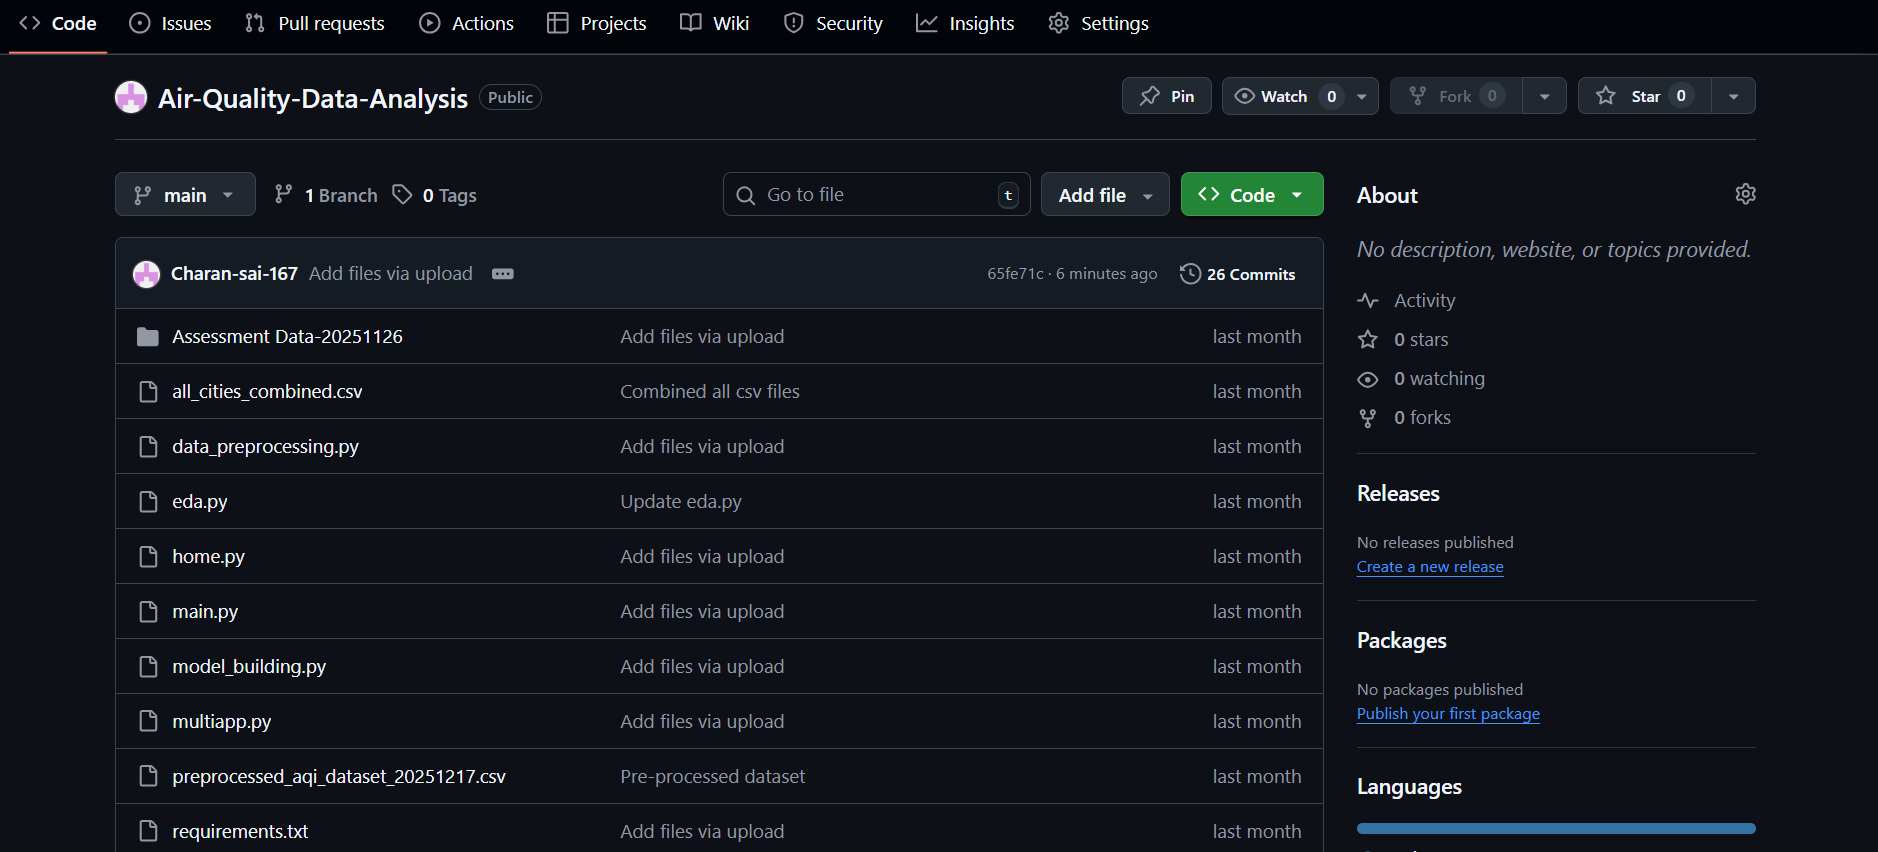

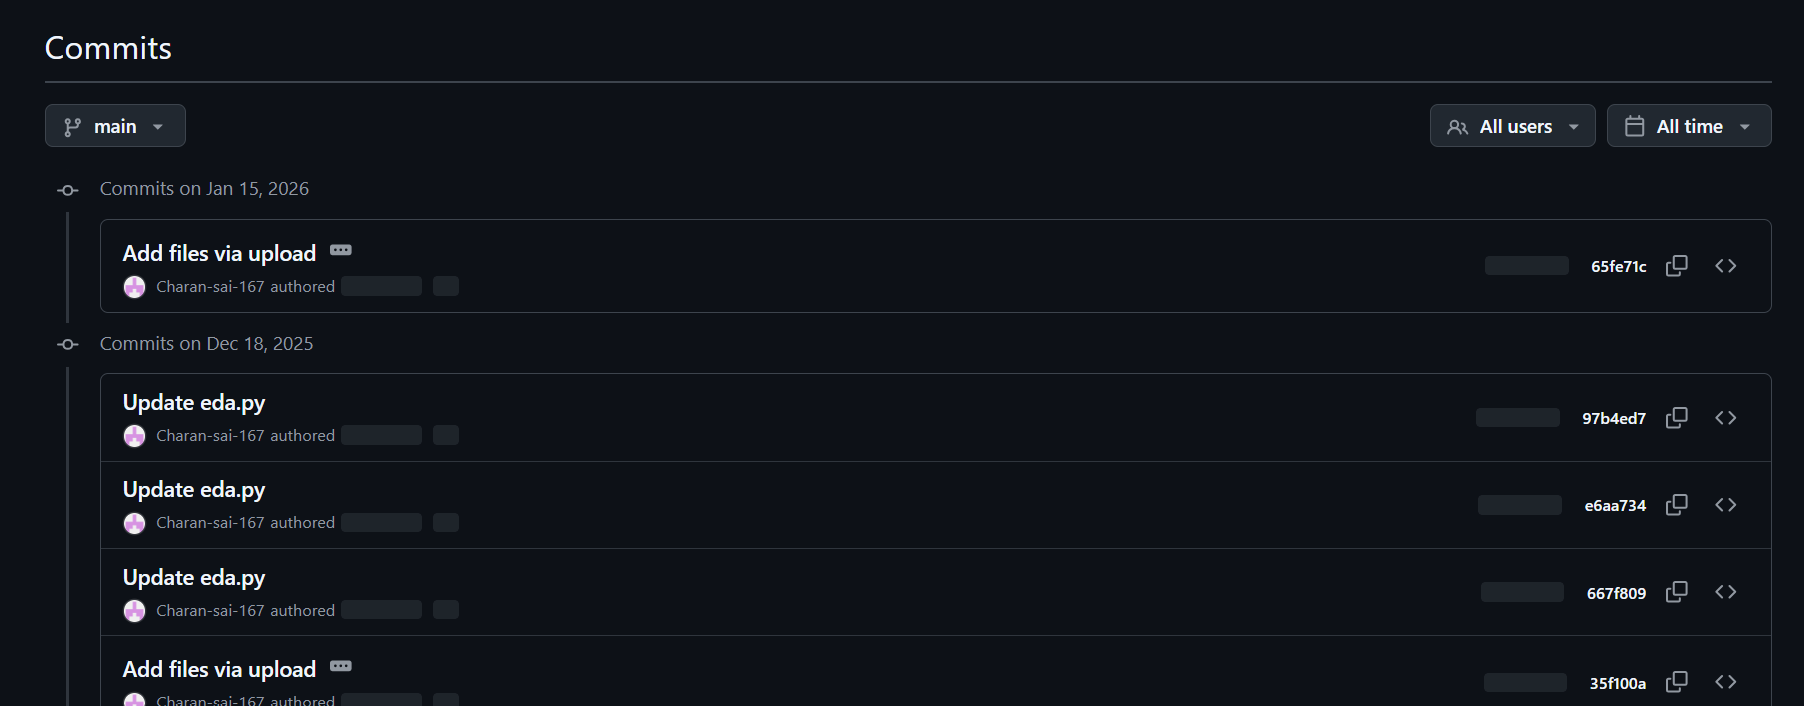